#**Conjuntos de Datos Personales de Costos Médicos**

Se obtiene un conjunto de datos inspirados en el libro Machine Learning with R de Brett Lantz. Los datos contienen información médica y costos facturados por las compañías de seguros de salud. Contiene 1338 filas de datos y las siguientes columnas: edad, sexo, IMC, niños, fumador, región, cargos del seguro.
El dataset se lo puede obtener en el siguiente [link](https://raw.githubusercontent.com/ElDiBu369/cursos/main/insurance.csv) .

***Columnas***

**age:** edad del beneficiario principal

**sex:** contratista de seguros género, mujer, hombre

**bim:** Índice de masa corporal, que proporciona una comprensión del cuerpo, pesos que son relativamente altos o bajos en relación con la altura, índice objetivo de peso corporal (kg / m ^ 2) utilizando la relación altura / peso, idealmente de 18,5 a 24,9

**children:** Número de niños cubiertos por el seguro de salud / Número de dependientes

**smoker:** Fumar

**region:** el área residencial del beneficiario en los Estados Unidos, noreste, sureste, suroeste, noroeste.

**charges:** Costos médicos individuales facturados por el seguro de salud

# Importar librerias

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Horas Trabajadas vs. Productos Terminados

## Importar librerias

In [2]:
# Cargar datos
data = pd.read_csv("https://raw.githubusercontent.com/ElDiBu369/cursos/main/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Grafica estadistica con subtramas

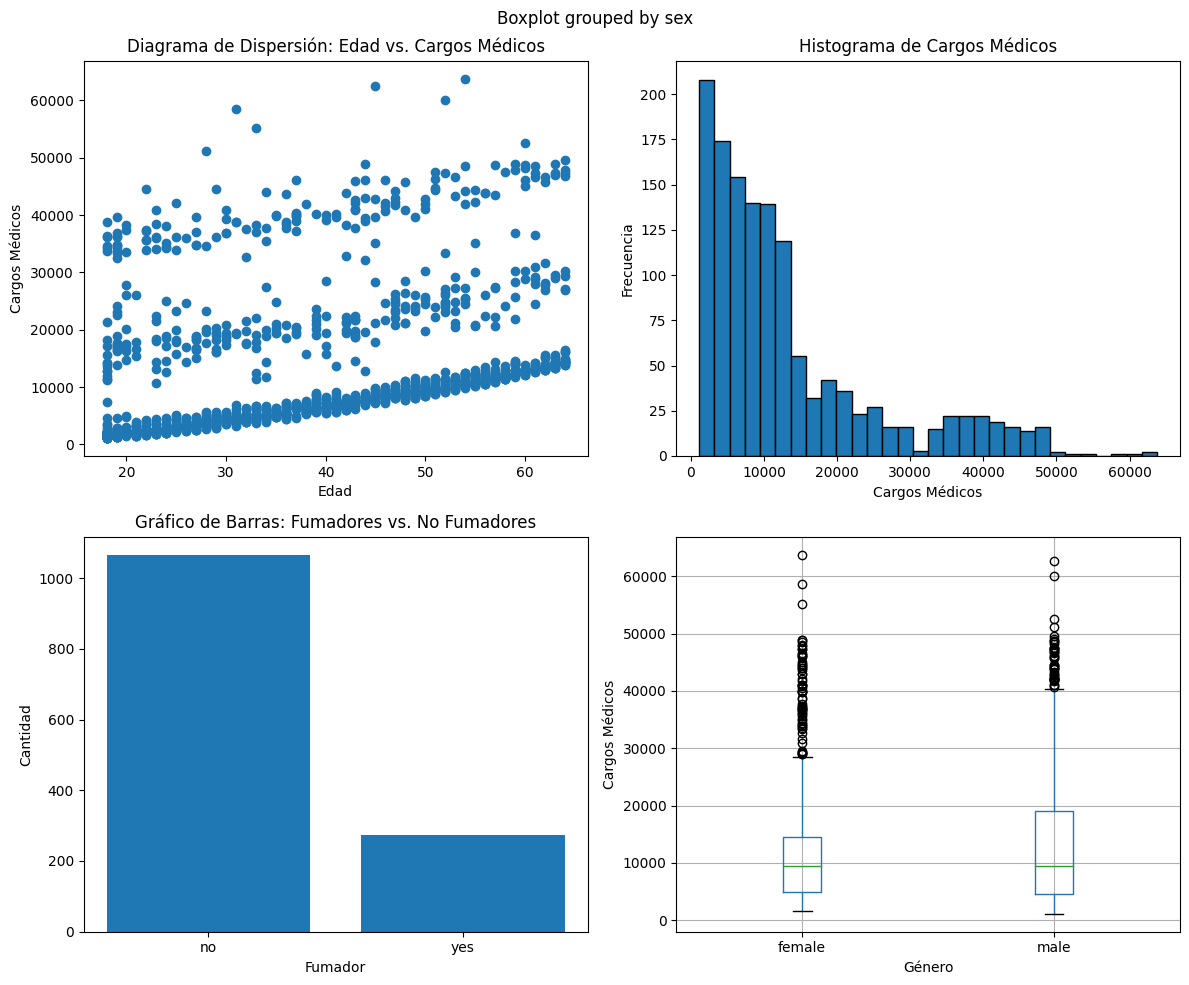

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# Diagrama de Dispersión: Edad vs. Cargos Médicos
axs[0, 0].scatter(data['age'], data['charges'])
axs[0, 0].set_xlabel('Edad')
axs[0, 0].set_ylabel('Cargos Médicos')
axs[0, 0].set_title('Diagrama de Dispersión: Edad vs. Cargos Médicos')
# Histograma de Cargos Médicos
axs[0, 1].hist(data['charges'], bins=30, edgecolor='k')
axs[0, 1].set_xlabel('Cargos Médicos')
axs[0, 1].set_ylabel('Frecuencia')
axs[0, 1].set_title('Histograma de Cargos Médicos')
# Gráfico de Barras: Fumadores vs. No Fumadores
smoker_counts = data['smoker'].value_counts()
axs[1, 0].bar(smoker_counts.index, smoker_counts.values)
axs[1, 0].set_xlabel('Fumador')
axs[1, 0].set_ylabel('Cantidad')
axs[1, 0].set_title('Gráfico de Barras: Fumadores vs. No Fumadores')
# Gráfico de Caja y Bigotes: Cargos Médicos por Género
data.boxplot(column='charges', by='sex', ax=axs[1, 1])
axs[1, 1].set_title('Gráfico de Caja y Bigotes: Cargos Médicos por Género')
axs[1, 1].set_xlabel('Género')
axs[1, 1].set_ylabel('Cargos Médicos')
axs[1, 1].set_title('Gráfico de Caja y Bigotes: Cargos Médicos por Género')
axs[1, 1].set_title('')  # Eliminar el título automático generado por pandas
# Ajustar el espaciado entre subtramas
plt.tight_layout()
# Mostrar el conjunto de gráficos
plt.show()

##Prosesamiento de la tabla;

Transformacion de la tabla a valores enteros para el primer caso

**sex:** female = 0, male = 1

**smoker:** yes = 1, no = 0

**region:** northeast = 0, northwest = 1, southeast = 2, southwest = 3.

In [4]:
# Lista de nombres de columnas categóricas a codificar
columns_to_encode = ['sex', 'smoker', 'region']

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Iterar a través de las columnas y aplicar la codificación
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


Se generan tres conjuntos de datos con diferentes instancias para compara los resultados y definir cuál de los tres casos el ajuste lineal obtiene el mejor resultado.

**df1:** bmi vs charges, **df2:** age vs charges, **df3:** smoker vs charges

In [5]:
df1 = data
df2 = data
df3 = data

## Seleccionar variables

In [6]:
variable_x1 = 'bmi'
variable_x2 = 'age'
variable_x3 = 'smoker'
variable_y = 'charges'

## Generar análisis para **df1:** bmi vs charges,

In [7]:
modelo1 = LinearRegression()
modelo1.fit(df1[[variable_x1]], df1[variable_y])
print ('Ecuación de la recta: y = ', round(modelo1.coef_[0],3),'x + ', round(modelo1.intercept_,3))#obtenemos la ecuación de la recta
print ('Coeficiente de correlación: ', round(np.corrcoef(df1[variable_x1], df1[variable_y])[0,1], 3))#obtenemos el coeficiente de correlación
print ('Coeficiente de determinación: ', round(r2_score(df1[variable_y], modelo1.predict(df1[[variable_x1]])), 3))#obtenemos el coeficiente de determinación

Ecuación de la recta: y =  393.873 x +  1192.937
Coeficiente de correlación:  0.198
Coeficiente de determinación:  0.039


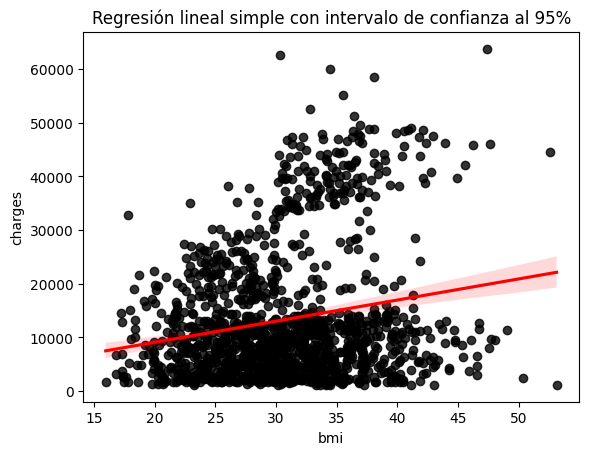

In [8]:
# Gráfica con intervalo de confianza
sns.regplot(x=df1[variable_x1], y=df1[variable_y], ci=95, line_kws={"color": "red"}, scatter_kws={"color": "black"})
plt.title('Regresión lineal simple con intervalo de confianza al 95%')
plt.show()

## Generar análisis para **df2:** age vs charges,

In [9]:
# Generar análisis df2
modelo2 = LinearRegression()
modelo2.fit(df2[[variable_x2]], df2[variable_y])
print ('Ecuación de la recta: y = ', round(modelo2.coef_[0],3),'x + ', round(modelo2.intercept_,3))#obtenemos la ecuación de la recta
print ('Coeficiente de correlación: ', round(np.corrcoef(df2[variable_x2], df2[variable_y])[0,1], 3))#obtenemos el coeficiente de correlación
print ('Coeficiente de determinación: ', round(r2_score(df2[variable_y], modelo2.predict(df2[[variable_x2]])), 3))#obtenemos el coeficiente de determinación

Ecuación de la recta: y =  257.723 x +  3165.885
Coeficiente de correlación:  0.299
Coeficiente de determinación:  0.089


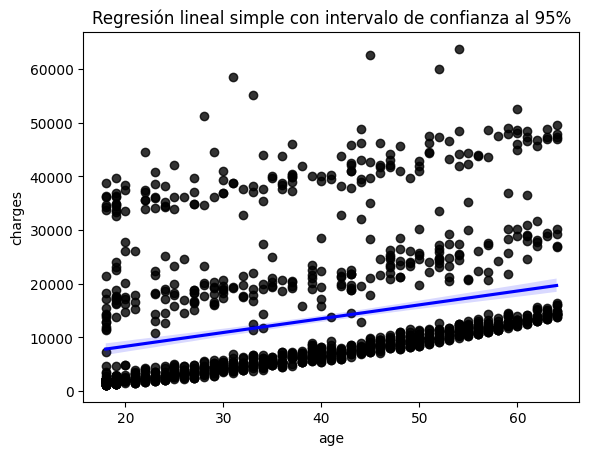

In [10]:
# Gráfica con intervalo de confianza
sns.regplot(x=df2[variable_x2], y=df2[variable_y], ci=95, line_kws={"color": "blue"}, scatter_kws={"color": "black"})
plt.title('Regresión lineal simple con intervalo de confianza al 95%')
plt.show()

## Generar análisis para **df3:** smoker vs charges

In [11]:
# Generar análisis df3
modelo3 = LinearRegression()
modelo3.fit(df3[[variable_x3]], df3[variable_y])
print ('Ecuación de la recta: y = ', round(modelo3.coef_[0],3),'x + ', round(modelo3.intercept_,3))#obtenemos la ecuación de la recta
print ('Coeficiente de correlación: ', round(np.corrcoef(df3[variable_x3], df3[variable_y])[0,1], 3))#obtenemos el coeficiente de correlación
print ('Coeficiente de determinación: ', round(r2_score(df3[variable_y], modelo3.predict(df3[[variable_x3]])), 3))#obtenemos el coeficiente de determinación

Ecuación de la recta: y =  23615.964 x +  8434.268
Coeficiente de correlación:  0.787
Coeficiente de determinación:  0.62


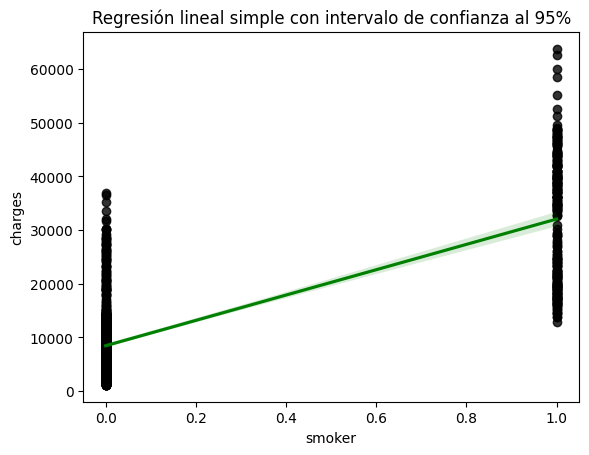

In [12]:
# Gráfica con intervalo de confianza
sns.regplot(x=df3[variable_x3], y=df3[variable_y], ci=95, line_kws={"color": "green"}, scatter_kws={"color": "black"})
plt.title('Regresión lineal simple con intervalo de confianza al 95%')
plt.show()

In [13]:
# Generar PREDICCIÓN con 'bmi' como variable independiente
dato_predictor = 15

bmi_nuevos = pd.DataFrame([dato_predictor], columns=[variable_x1])  # Convertir a DataFrame
charges_prediccion = modelo1.predict(bmi_nuevos)
print('La predicción de cargos médicos para un BMI de', bmi_nuevos.iloc[0][0], 'es', round(charges_prediccion[0], 3))


La predicción de cargos médicos para un BMI de 15 es 7101.033


In [14]:
# Generar PREDICCIÓN para 'age' como variable independiente
dato_predictor_age = 15

age_nuevos = pd.DataFrame([dato_predictor_age], columns=[variable_x2])  # Convertir a DataFrame
charges_prediccion_age = modelo2.predict(age_nuevos)
print('La predicción de cargos médicos para una edad de', age_nuevos.iloc[0][0], 'es', round(charges_prediccion_age[0], 3))


La predicción de cargos médicos para una edad de 15 es 7031.724


In [15]:
# Generar PREDICCIÓN para 'smoker' como variable independiente
dato_predictor_smoker = 1

smoker_nuevos = pd.DataFrame([dato_predictor_smoker], columns=[variable_x3])  # Convertir a DataFrame
charges_prediccion_smoker = modelo3.predict(smoker_nuevos)
print('La predicción de cargos médicos para la variable "smoker" con un valor de', smoker_nuevos.iloc[0][0], 'es', round(charges_prediccion_smoker[0], 3))


La predicción de cargos médicos para la variable "smoker" con un valor de 1 es 32050.232
